# Naive Bayes Algorithm:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_dataset(gender_submission):
    dataset = pd.read_csv(gender_submission)
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    return X, y

In [3]:
def train_test_split(X, y, test_ratio=0.3, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, X_test, y_train, y_test


In [4]:
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.variance = None
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.variance = np.zeros((len(self.classes), X.shape[1]))
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[i] = len(X_c) / len(X)
            self.mean[i] = X_c.mean(axis=0)
            self.variance[i] = X_c.var(axis=0)
    
    def _calculate_likelihood(self, X, class_index):
        likelihood = np.exp(-((X - self.mean[class_index]) ** 2) / (2 * self.variance[class_index]))
        return likelihood.prod(axis=1)
    
    def predict(self, X):
        posteriors = []
        
        for i, c in enumerate(self.classes):
            prior = np.log(self.class_priors[i])
            likelihood = np.log(self._calculate_likelihood(X, i))
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        posteriors = np.array(posteriors)
        return self.classes[np.argmax(posteriors, axis=0)]

Accuracy: 0.672


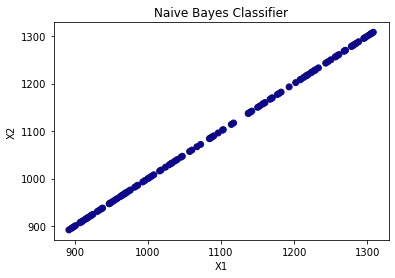

In [8]:
def main():
    # Load dataset
    filename = "gender_submission.csv"
    X, y = load_dataset(filename)
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Train the Naive Bayes classifier
    classifier = NaiveBayesClassifier()
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate the classifier
    accuracy = (y_pred == y_test).mean()
    print("Accuracy:", accuracy)
    
    # Visualize the data and predictions
    plt.scatter(X_test[:, 0], X_test[:, ], c=y_pred, cmap="plasma")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Naive Bayes Classifier")
    plt.show()

if __name__ == "__main__":
    main()